In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [12]:
train_df=pd.read_csv('train_data.csv')
validation_df=pd.read_csv('validation_data.csv')
test_df=pd.read_csv('test_data.csv')

In [13]:
train_df['CategoryNo']=train_df['CategoryCode'].map({'category_1':1,'category_2': 2,'category_3':3,'category_4':4})
train_df.head()

,CategoryCode,ItemCode,DateID,DailySales,CategoryNo
0,category_2,117610,11/6/2021,7,2
1,category_4,836584,11/18/2021,16,4
2,category_1,370195,1/24/2022,6,1
3,category_2,172582,10/30/2021,5,2
4,category_2,1006009,10/30/2021,5,2


In [14]:
from datetime import datetime

s1=[]


for i in train_df['DateID']:
  d1=datetime.strptime(i, '%m/%d/%Y')
  s1.append(d1)

d1 = pd.Series(s1,name='date')

d1

0       2021-11-06
1       2021-11-18
2       2022-01-24
3       2021-10-30
4       2021-10-30
           ...    
19916   2021-10-04
19917   2021-10-12
19918   2021-10-01
19919   2021-10-01
19920   2021-10-04
Name: date, Length: 19921, dtype: datetime64[ns]

In [15]:
train_df=pd.concat([train_df, d1], axis=1)
train_df.head()

,CategoryCode,ItemCode,DateID,DailySales,CategoryNo,date
0,category_2,117610,11/6/2021,7,2,2021-11-06
1,category_4,836584,11/18/2021,16,4,2021-11-18
2,category_1,370195,1/24/2022,6,1,2022-01-24
3,category_2,172582,10/30/2021,5,2,2021-10-30
4,category_2,1006009,10/30/2021,5,2,2021-10-30


In [16]:
from datetime import date
s_date=datetime.strptime('10/01/2021', '%m/%d/%Y')
s_date=s_date.date()
s_date

weeks_no=[]
for i in train_df['date']:
  da=((i.date()-s_date).days)//7
  da=da+1
  weeks_no.append(da)

d2 = pd.Series(weeks_no,name='Week')
train_df=pd.concat([train_df, d2], axis=1)
train_df.head()

,CategoryCode,ItemCode,DateID,DailySales,CategoryNo,date,Week
0,category_2,117610,11/6/2021,7,2,2021-11-06,6
1,category_4,836584,11/18/2021,16,4,2021-11-18,7
2,category_1,370195,1/24/2022,6,1,2022-01-24,17
3,category_2,172582,10/30/2021,5,2,2021-10-30,5
4,category_2,1006009,10/30/2021,5,2,2021-10-30,5


In [17]:
train_df['WeeklySales']=train_df.groupby(['CategoryNo','ItemCode','Week'])['DailySales'].transform(sum)
train_df

,CategoryCode,ItemCode,DateID,DailySales,CategoryNo,date,Week,WeeklySales
0,category_2,117610,11/6/2021,7,2,2021-11-06,6,56
1,category_4,836584,11/18/2021,16,4,2021-11-18,7,117
2,category_1,370195,1/24/2022,6,1,2022-01-24,17,39
3,category_2,172582,10/30/2021,5,2,2021-10-30,5,26
4,category_2,1006009,10/30/2021,5,2,2021-10-30,5,12
...,...,...,...,...,...,...,...,...
19916,category_2,225259,10/4/2021,4,2,2021-10-04,1,18
19917,category_2,111436,10/12/2021,1,2,2021-10-12,2,10
19918,category_2,1098502,10/1/2021,1,2,2021-10-01,1,9
19919,category_2,20824,10/1/2021,7,2,2021-10-01,1,136


In [18]:
train_df['year']= train_df['date'].dt.year
train_df['month']= train_df['date'].dt.month
train_df['week_of_year'] = train_df['date'].dt.week

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  This is separate from the ipykernel package so we can avoid doing imports until


In [19]:
train_df

,CategoryCode,ItemCode,DateID,DailySales,CategoryNo,date,Week,WeeklySales,year,month,week_of_year
0,category_2,117610,11/6/2021,7,2,2021-11-06,6,56,2021,11,44
1,category_4,836584,11/18/2021,16,4,2021-11-18,7,117,2021,11,46
2,category_1,370195,1/24/2022,6,1,2022-01-24,17,39,2022,1,4
3,category_2,172582,10/30/2021,5,2,2021-10-30,5,26,2021,10,43
4,category_2,1006009,10/30/2021,5,2,2021-10-30,5,12,2021,10,43
...,...,...,...,...,...,...,...,...,...,...,...
19916,category_2,225259,10/4/2021,4,2,2021-10-04,1,18,2021,10,40
19917,category_2,111436,10/12/2021,1,2,2021-10-12,2,10,2021,10,41
19918,category_2,1098502,10/1/2021,1,2,2021-10-01,1,9,2021,10,39
19919,category_2,20824,10/1/2021,7,2,2021-10-01,1,136,2021,10,39


In [21]:
train=train_df[['CategoryNo','ItemCode','Week','WeeklySales','year','month','week_of_year']]
train.drop_duplicates(keep='first',inplace=True)
train

/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


,CategoryNo,ItemCode,Week,WeeklySales,year,month,week_of_year
0,2,117610,6,56,2021,11,44
1,4,836584,7,117,2021,11,46
2,1,370195,17,39,2022,1,4
3,2,172582,5,26,2021,10,43
4,2,1006009,5,12,2021,10,43
...,...,...,...,...,...,...,...
19793,1,1015621,1,4,2021,10,39
19798,2,1090276,11,2,2021,12,50
19867,2,999403,2,6,2021,10,41
19889,2,999403,1,3,2021,10,40


In [22]:
train=train.reset_index(drop=True)

In [23]:
train

,CategoryNo,ItemCode,Week,WeeklySales,year,month,week_of_year
0,2,117610,6,56,2021,11,44
1,4,836584,7,117,2021,11,46
2,1,370195,17,39,2022,1,4
3,2,172582,5,26,2021,10,43
4,2,1006009,5,12,2021,10,43
...,...,...,...,...,...,...,...
7605,1,1015621,1,4,2021,10,39
7606,2,1090276,11,2,2021,12,50
7607,2,999403,2,6,2021,10,41
7608,2,999403,1,3,2021,10,40


In [24]:
train.corr()

,CategoryNo,ItemCode,Week,WeeklySales,year,month,week_of_year
CategoryNo,1.000000,0.084967,-0.019253,0.182079,-0.017613,0.015787,0.018280
ItemCode,0.084967,1.000000,-0.000878,-0.164303,-0.003941,0.004193,0.005327
Week,-0.019253,-0.000878,1.000000,0.003113,0.800788,-0.706233,-0.666577
WeeklySales,0.182079,-0.164303,0.003113,1.000000,0.002097,-0.001981,0.001040
year,-0.017613,-0.003941,0.800788,0.002097,1.000000,-0.987838,-0.917410
month,0.015787,0.004193,-0.706233,-0.001981,-0.987838,1.000000,0.926327
week_of_year,0.018280,0.005327,-0.666577,0.001040,-0.917410,0.926327,1.000000


In [52]:
train['ItemCode'].unique()

array([ 117610,  836584,  370195,  172582, 1006009,  903976,  145978,
       1061341,  371239,  865933, 1081087, 1032550, 1090249,  169504,
       1067092, 1054978, 1050046, 1044610,  138742,  815101,   59047,
         39436,  379249, 1048975,  213802,  877624, 1060909, 1103056,
        836125,   43657,  131983, 1098493,   76399, 1032559,   38518,
       1010068, 1076938, 1044691,   64978,  172033, 1090024, 1067074,
       1021264, 1071106,   30877, 1047130,  118033,   48940,  110320,
       1006108, 1101661, 1064473,  839374, 1003192, 1047967,   59749,
       1044502,  174436,  838456,   42424,   43630,  913561,  745945,
        262384,   36898, 1006090, 1090240, 1032532,   87046, 1024810,
        130993,   24136,  123307,   20824,   57058,    3427,   32245,
         16936, 1060630,   41830,  837943, 1074823, 1066570,  173617,
       1044682,   75886,  753613,  111382, 1032541,  371104,  210868,
         37861,   42496, 1090276, 1003156, 1101769, 1090258, 1056463,
         87559,  142

In [61]:
train['monthsales']=train.groupby(['month'])['WeeklySales'].transform(sum)
train

,CategoryNo,ItemCode,Week,WeeklySales,year,month,week_of_year,monthsales
0,2,117610,6,56,2021,11,44,67418
1,4,836584,7,117,2021,11,46,67418
2,1,370195,17,39,2022,1,4,77884
3,2,172582,5,26,2021,10,43,63513
4,2,1006009,5,12,2021,10,43,63513
...,...,...,...,...,...,...,...,...
7605,1,1015621,1,4,2021,10,39,63513
7606,2,1090276,11,2,2021,12,50,77028
7607,2,999403,2,6,2021,10,41,63513
7608,2,999403,1,3,2021,10,40,63513


In [63]:
train['itemsales']=train.groupby(['ItemCode'])['WeeklySales'].transform(sum)
train

,CategoryNo,ItemCode,Week,WeeklySales,year,month,week_of_year,monthsales,itemsales
0,2,117610,6,56,2021,11,44,67418,660
1,4,836584,7,117,2021,11,46,67418,5700
2,1,370195,17,39,2022,1,4,77884,2029
3,2,172582,5,26,2021,10,43,63513,819
4,2,1006009,5,12,2021,10,43,63513,291
...,...,...,...,...,...,...,...,...,...
7605,1,1015621,1,4,2021,10,39,63513,204
7606,2,1090276,11,2,2021,12,50,77028,408
7607,2,999403,2,6,2021,10,41,63513,677
7608,2,999403,1,3,2021,10,40,63513,677


Text(0, 0.5, 'WeeklySales')

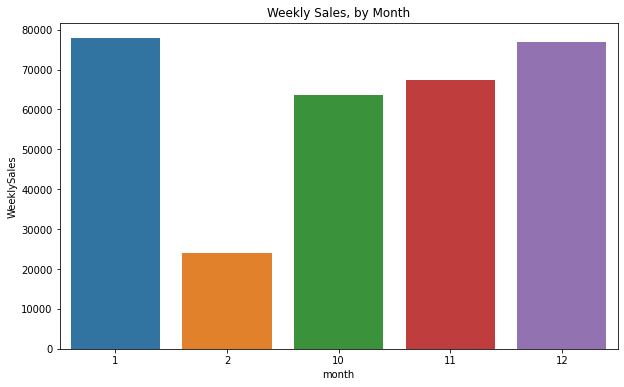

In [62]:
import seaborn as sns
plt.figure(figsize=(10,6))

# Add title
plt.title("Weekly Sales, by Month")

# Bar chart showing average arrival delay for Spirit Airlines flights by month
sns.barplot(x=train['month'], y=train['monthsales'])

# Add label for vertical axis
plt.ylabel("WeeklySales")

In [64]:
train.sort_values(
     by="itemsales",
     ascending=False
 )

,CategoryNo,ItemCode,Week,WeeklySales,year,month,week_of_year,monthsales,itemsales
1783,3,169504,3,669,2021,10,42,63513,25556
2791,3,169504,13,653,2021,12,51,77028,25556
3303,3,169504,18,360,2022,1,4,77884,25556
1617,3,169504,6,716,2021,11,45,67418,25556
4194,3,169504,8,676,2021,11,46,67418,25556
...,...,...,...,...,...,...,...,...,...
6379,2,64978,16,2,2022,1,2,77884,184
4022,2,64978,13,4,2021,12,52,77028,184
6438,2,64978,9,16,2021,11,47,67418,184
6466,2,64978,14,4,2022,1,52,77884,184


In [25]:
validation_df['CategoryNo']=validation_df['CategoryCode'].map({'category_1':1,'category_2': 2,'category_3':3,'category_4':4})
validation_df['Week']=validation_df['Week'].map({'w1':1,'w2': 2,'w3':3,'w4':4})

validation_df.head()

,CategoryCode,ItemCode,Week,WeeklySales,CategoryNo
0,category_2,1044502,1,11,2
1,category_2,1105009,1,11,2
2,category_2,913561,4,5,2
3,category_1,1048975,4,30,1
4,category_1,17287,2,60,1


In [26]:
import datetime
validation_df["year"] = 2022
w1=datetime.date(2022,2,14).isocalendar()[1]
scale_mapper1 = {1:w1, 2:w1+1, 3:w1+2,4:w1+3}
validation_df["week_of_year"] = validation_df["Week"].map(scale_mapper1)
scale_mapper2 = {1:2, 2:2, 3:3,4:3}
validation_df["month"] = validation_df["Week"].map(scale_mapper2)
validation_df

,CategoryCode,ItemCode,Week,WeeklySales,CategoryNo,year,week_of_year,month
0,category_2,1044502,1,11,2,2022,7,2
1,category_2,1105009,1,11,2,2022,7,2
2,category_2,913561,4,5,2,2022,10,3
3,category_1,1048975,4,30,1,2022,10,3
4,category_1,17287,2,60,1,2022,8,2
...,...,...,...,...,...,...,...,...
365,category_2,124954,2,43,2,2022,8,2
366,category_2,40759,1,48,2,2022,7,2
367,category_1,1090303,1,19,1,2022,7,2
368,category_2,1090276,3,6,2,2022,9,3


In [27]:
X=train[['CategoryNo','ItemCode','month','week_of_year']]
y=train['WeeklySales']

In [28]:
X_val=validation_df[['CategoryNo','ItemCode','month','week_of_year']]
y_val=validation_df['WeeklySales']

In [29]:
import lightgbm as lgb
from sklearn.metrics import mean_absolute_percentage_error
trees = [100,500,1000,2000]
eta=[0.01,0.05,0.1,0.3]

for n in trees:
  for e in eta:
    model = lgb.LGBMRegressor(n_estimators=n,learning_rate=e)
    model.fit(X,y)
    y_pred2=np.round(model.predict(X_val))
    print(n)
    print(e)
    print("Accuracy score (validation): {0:.3f}".format(mean_absolute_percentage_error(y_val,y_pred2)))
    print("-------------------------------------------------------------")


100
0.01
Accuracy score (validation): 1.545
-------------------------------------------------------------
100
0.05
Accuracy score (validation): 0.739
-------------------------------------------------------------
100
0.1
Accuracy score (validation): 0.665
-------------------------------------------------------------
100
0.3
Accuracy score (validation): 0.653
-------------------------------------------------------------
500
0.01
Accuracy score (validation): 0.746
-------------------------------------------------------------
500
0.05
Accuracy score (validation): 0.673
-------------------------------------------------------------
500
0.1
Accuracy score (validation): 0.652
-------------------------------------------------------------
500
0.3
Accuracy score (validation): 0.634
-------------------------------------------------------------
1000
0.01
Accuracy score (validation): 0.669
-------------------------------------------------------------
1000
0.05
Accuracy score (validation): 0.671
----

In [30]:
import lightgbm as lgb
lgbm=lgb.LGBMRegressor(n_estimators=2000,learning_rate=0.3)
lgbm.fit(X,y)


LGBMRegressor(learning_rate=0.3, n_estimators=2000)

In [31]:
from sklearn.metrics import mean_absolute_percentage_error
y_pred=np.round(lgbm.predict(X_val))
mean_absolute_percentage_error(y_val,y_pred)

0.5950132271508066

In [32]:
from sklearn.metrics import mean_squared_error,r2_score
r2=r2_score(y_val,y_pred)
r2

0.5791360111586767

In [33]:
(abs(y_pred-y_val).sum())/(y_val.sum())

0.5105239871057455

In [34]:
d1 = pd.Series(y_pred,name='PredictedSales')
df=pd.concat([y_val, d1], axis=1)
df

,WeeklySales,PredictedSales
0,11,13.0
1,11,6.0
2,5,7.0
3,30,23.0
4,60,12.0
...,...,...
365,43,22.0
366,48,22.0
367,19,9.0
368,6,10.0


In [35]:
test_df['CategoryNo']=test_df['CategoryCode'].map({'category_1':1,'category_2': 2,'category_3':3,'category_4':4})
test_df["year"] = 2022
w1=datetime.date(2022,2,14).isocalendar()[1]
scale_mapper1 = {'w1':w1, 'w2':w1+1, 'w3':w1+2,'w4':w1+3}
test_df["week_of_year"] = test_df["Week"].map(scale_mapper1)
scale_mapper2 = {'w1':2, 'w2':2, 'w3':3,'w4':3}
test_df["month"] = test_df["Week"].map(scale_mapper2)
test_df

,CategoryCode,ItemCode,Week,PredictedSales,CategoryNo,year,week_of_year,month
0,category_1,43738,w4,NaN,1,2022,10,3
1,category_2,1006090,w1,NaN,2,2022,7,2
2,category_2,1076929,w4,NaN,2,2022,10,3
3,category_1,1081321,w3,NaN,1,2022,9,3
4,category_2,216151,w4,NaN,2,2022,10,3
...,...,...,...,...,...,...,...,...
372,category_2,1101571,w1,NaN,2,2022,7,2
373,category_2,1090258,w4,NaN,2,2022,10,3
374,category_2,906595,w1,NaN,2,2022,7,2
375,category_2,32245,w1,NaN,2,2022,7,2


In [36]:
X_test=test_df[['CategoryNo','ItemCode','month','week_of_year']]

In [37]:
y_test=np.round(lgbm.predict(X_test))

In [38]:
y_test

array([ 18.,  13.,   1.,   9.,  10.,   2.,  38.,  18.,   5.,  10.,  23.,
         8., 391.,  63.,  21.,  63.,  13.,  23.,  13.,   9.,   1.,   0.,
        21.,  40.,  14.,  11.,  63.,   7.,   2.,   3.,  40.,   9.,   4.,
        18.,  21., 104.,  10.,  11.,  13., 270.,  21.,  13.,  22.,  10.,
         9.,  23.,   9.,   7.,  13.,  74.,  12.,   9.,  11.,   7.,   4.,
        57.,   3.,  43., 136.,   9.,  25.,  93.,  21.,   7.,  25.,  10.,
        13.,  25.,  43.,  60.,  60.,   5.,  11.,   6.,  46.,  40.,   8.,
        53.,  40.,  16.,  13.,   5.,  39.,   7.,   8., 136., 101.,  11.,
        23.,  40.,  14.,   3.,   7.,   9.,  15.,   3.,  33.,  11.,   3.,
        23.,   9.,  63.,  23.,   6.,  16.,   4.,  48., 270.,  13.,   3.,
         2.,  39.,   4.,  93.,  10.,  16.,   3.,  12.,  10.,   3.,  20.,
         8.,  15.,   0.,   6.,   6.,  40.,   4.,  22.,  10.,   4.,   3.,
        20.,  13.,  19.,   7.,  15.,  23.,  12.,  20.,  11.,   3., 104.,
         4.,   3.,  40.,   9.,  13.,  39.,  11.,   

In [39]:
d1 = pd.Series(y_test,name='WeeklySales')
df=pd.concat([test_df[['CategoryCode','ItemCode','Week']], d1], axis=1)

In [40]:
df['random'] = df['ItemCode'].astype(str)
df['ID']=df['CategoryCode']+'_'+df['random']+'_'+df['Week']

In [41]:
df

,CategoryCode,ItemCode,Week,WeeklySales,random,ID
0,category_1,43738,w4,18.0,43738,category_1_43738_w4
1,category_2,1006090,w1,13.0,1006090,category_2_1006090_w1
2,category_2,1076929,w4,1.0,1076929,category_2_1076929_w4
3,category_1,1081321,w3,9.0,1081321,category_1_1081321_w3
4,category_2,216151,w4,10.0,216151,category_2_216151_w4
...,...,...,...,...,...,...
372,category_2,1101571,w1,13.0,1101571,category_2_1101571_w1
373,category_2,1090258,w4,23.0,1090258,category_2_1090258_w4
374,category_2,906595,w1,7.0,906595,category_2_906595_w1
375,category_2,32245,w1,43.0,32245,category_2_32245_w1


In [43]:
df2=df[['ID','WeeklySales']]
df2

,ID,WeeklySales
0,category_1_43738_w4,18.0
1,category_2_1006090_w1,13.0
2,category_2_1076929_w4,1.0
3,category_1_1081321_w3,9.0
4,category_2_216151_w4,10.0
...,...,...
372,category_2_1101571_w1,13.0
373,category_2_1090258_w4,23.0
374,category_2_906595_w1,7.0
375,category_2_32245_w1,43.0


In [ ]:
df2.to_csv('submission4.csv',index=False)